<a href="https://colab.research.google.com/github/swapnalisingh13/projects/blob/main/Lab8_2348565.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score

In [ ]:
df=pd.read_csv('/content/completeSpamAssassin.csv')
df

,Unnamed: 0,Body,Label
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,3,##############################################...,1
4,4,I thought you might like these:\n1) Slim Down ...,1
...,...,...,...
6041,6041,empty,0
6042,6042,___ ___ ...,0
6043,6043,IN THIS ISSUE:01. Readers write\n02. Extension...,0
6044,6044,empty,0


Data Pre-processing

In [ ]:
df.shape

(6046, 3)

In [ ]:
df.isnull().sum()

Unnamed: 0    0
Body          1
Label         0
dtype: int64

Droppping NA values

In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
df.shape

(6045, 3)

Distribution of dataset

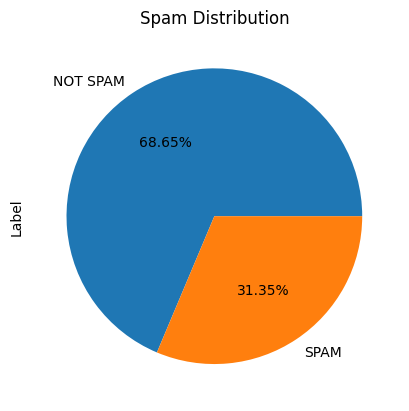

In [ ]:
plt.title("Spam Distribution")
df["Label"].map({0: "NOT SPAM", 1: "SPAM"}).value_counts().plot.pie(autopct='%2.2f%%')
plt.show()

From the dataset we found that 68.65% messages are NOT SPAM and 31.35% is SPAM.

**Laplace smoothening**

In [ ]:
def laplace_smoothing(data, alpha=1, label_column='Label', text_column='Body'):
    word_counts = defaultdict(lambda: {'spam': alpha, 'non_spam': alpha})
    class_counts = {'spam': 0, 'non_spam': 0}
    for index, row in data.iterrows():
        label = 'spam' if row[label_column] == 1 else 'non_spam'
        text = row[text_column].split()
        for word in text:
            word_counts[word][label] += 1
            class_counts[label] += 1

    return word_counts, class_counts

word_counts, class_counts = laplace_smoothing(df)
word_counts

defaultdict(<function __main__.laplace_smoothing.<locals>.<lambda>()>,
            {'Save': {'spam': 157, 'non_spam': 10},
             'up': {'spam': 668, 'non_spam': 1649},
             'to': {'spam': 12903, 'non_spam': 24786},
             '70%': {'spam': 46, 'non_spam': 2},
             'on': {'spam': 2746, 'non_spam': 6485},
             'Life': {'spam': 98, 'non_spam': 46},
             'Insurance.': {'spam': 6, 'non_spam': 1},
             'Why': {'spam': 74, 'non_spam': 124},
             'Spend': {'spam': 12, 'non_spam': 1},
             'More': {'spam': 74, 'non_spam': 157},
             'Than': {'spam': 9, 'non_spam': 5},
             'You': {'spam': 1084, 'non_spam': 756},
             'Have': {'spam': 95, 'non_spam': 57},
             'To?Life': {'spam': 3, 'non_spam': 1},
             'Quote': {'spam': 24, 'non_spam': 13},
             'Savings': {'spam': 24, 'non_spam': 6},
             'Ensuring': {'spam': 2, 'non_spam': 1},
             'your': {'spam': 5506, 'non_spam

**Naive Bayes**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['Body'], df['Label'], test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

naive_bayes = MultinomialNB(alpha=1.0)
naive_bayes.fit(X_train_vec, y_train)
y_pred = naive_bayes.predict(X_test_vec)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

report = classification_report(y_test, y_pred, target_names=['Non-Spam', 'Spam'])
print(report)

Accuracy: 0.96
              precision    recall  f1-score   support

    Non-Spam       0.99      0.95      0.97       807
        Spam       0.91      0.98      0.94       402

    accuracy                           0.96      1209
   macro avg       0.95      0.96      0.96      1209
weighted avg       0.96      0.96      0.96      1209



**Confusionn matrix**

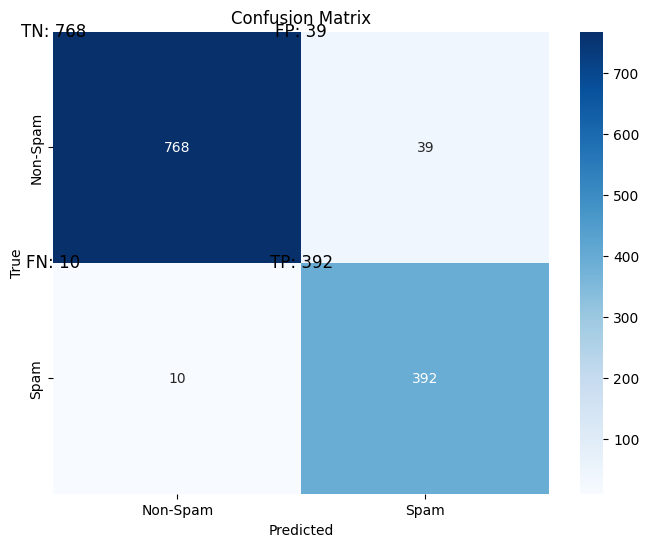

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = conf_matrix.ravel()

labels = ['Non-Spam', 'Spam']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.text(0, 0, f'TN: {TN}', ha='center', va='center', fontsize=12, color='black')
plt.text(1, 0, f'FP: {FP}', ha='center', va='center', fontsize=12, color='black')
plt.text(0, 1, f'FN: {FN}', ha='center', va='center', fontsize=12, color='black')
plt.text(1, 1, f'TP: {TP}', ha='center', va='center', fontsize=12, color='black')

# Show the plot
plt.show()


ROC CURVE

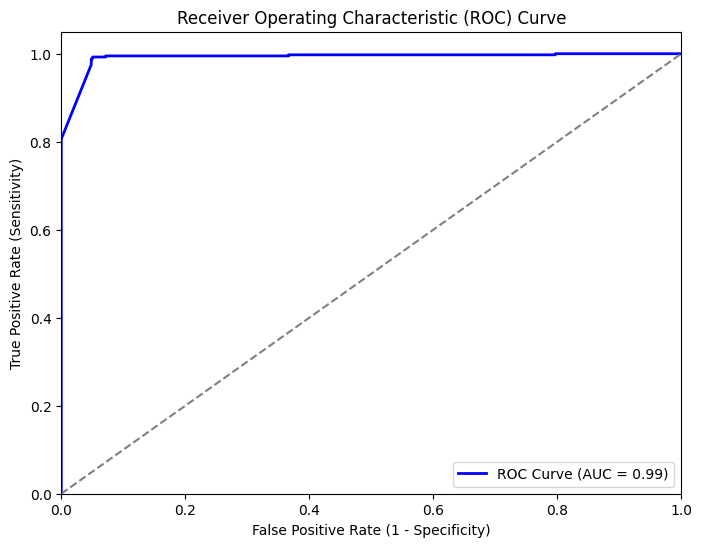

In [ ]:
y_pred_prob = naive_bayes.predict_proba(X_test_vec)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', linewidth=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Precision-Recall curve

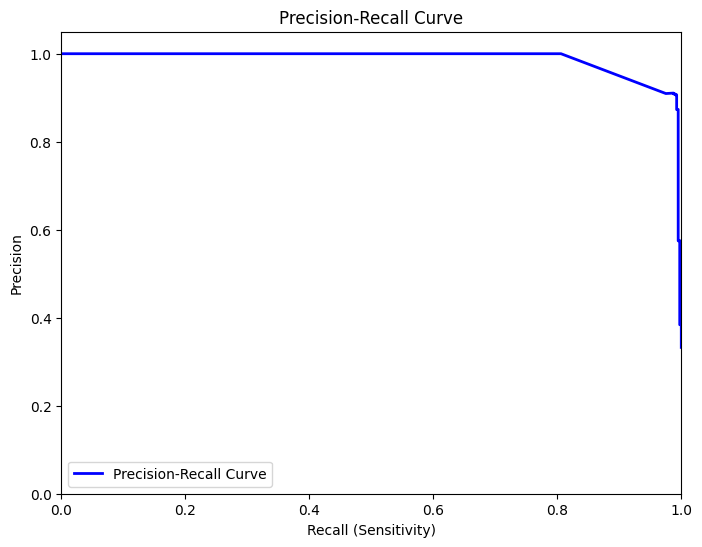

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', linewidth=2, label='Precision-Recall Curve')
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower left')
plt.show()

Feature Importance Curve

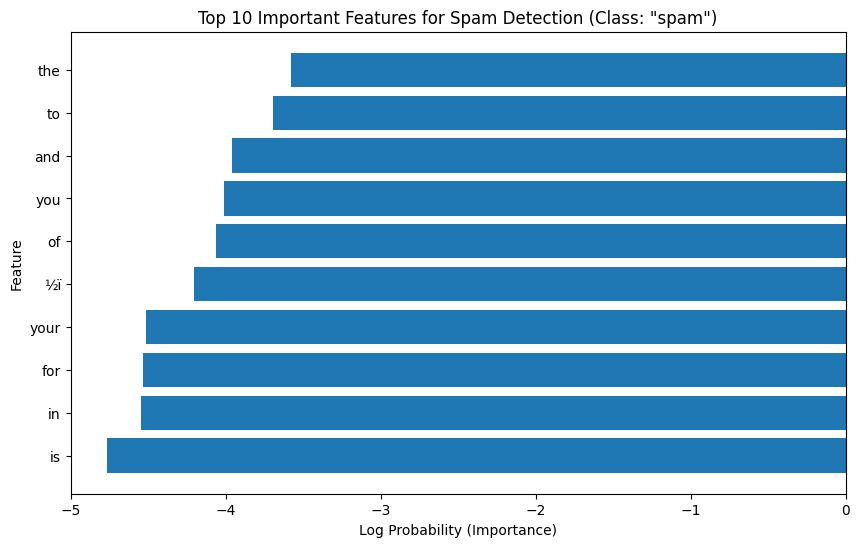

In [ ]:
import numpy as np
feature_names = np.array(vectorizer.get_feature_names_out())
class_log_probabilities = naive_bayes.feature_log_prob_
class_index = 1
coefficients = class_log_probabilities[class_index]
feature_coeff_dict = dict(zip(feature_names, coefficients))
sorted_features = sorted(feature_coeff_dict.items(), key=lambda x: x[1], reverse=True)
N = 10

top_features = sorted_features[:N]
top_feature_names, top_feature_coefficients = zip(*top_features)

plt.figure(figsize=(10, 6))
plt.barh(range(N), top_feature_coefficients, align='center')
plt.yticks(range(N), top_feature_names)
plt.xlabel('Log Probability (Importance)')
plt.ylabel('Feature')
plt.title(f'Top {N} Important Features for Spam Detection (Class: "spam")')
plt.gca().invert_yaxis()
plt.show()


Model evaluation.

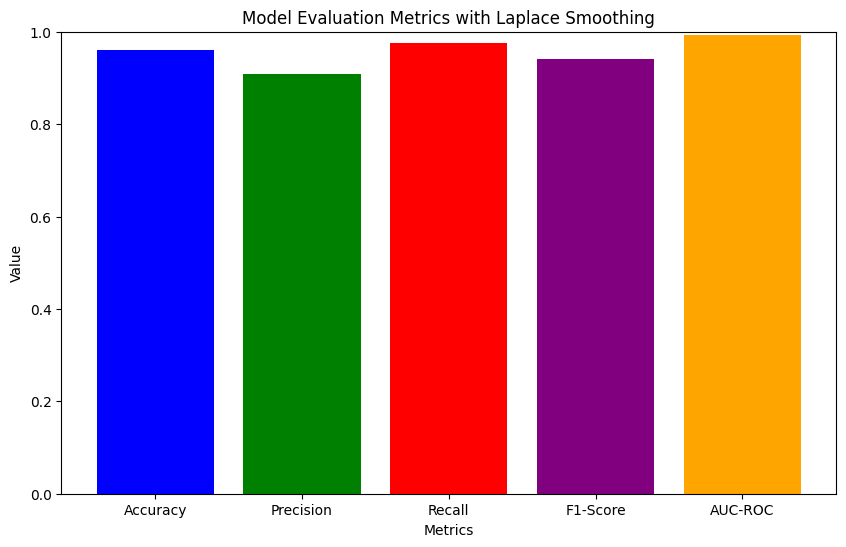

In [ ]:
y_pred = naive_bayes.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
values = [accuracy, precision, recall, f1, roc_auc]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Model Evaluation Metrics with Laplace Smoothing')
plt.ylim(0, 1)  # Set the y-axis range between 0 and 1 for better visualization
plt.show()

Threshold Selection Graph

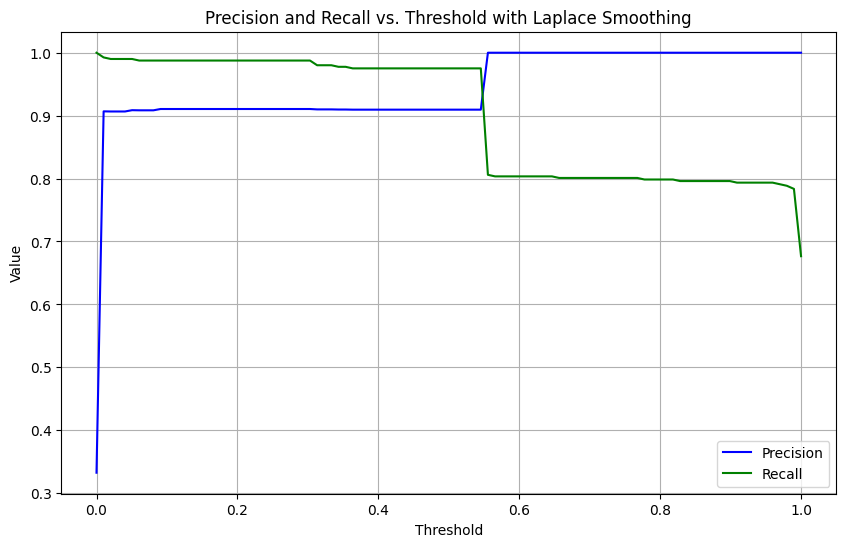

In [ ]:
thresholds = np.linspace(0, 1, 100)
precision_values = []
recall_values = []
for threshold in thresholds:

    y_pred_thresholded = (y_pred_prob >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_thresholded)
    recall = recall_score(y_test, y_pred_thresholded)
    precision_values.append(precision)
    recall_values.append(recall)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_values, label='Precision', color='blue')
plt.plot(thresholds, recall_values, label='Recall', color='green')
plt.xlabel('Threshold')
plt.ylabel('Value')
plt.title('Precision and Recall vs. Threshold with Laplace Smoothing')
plt.legend()
plt.grid(True)
plt.show()